# examples using chronos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## search target

In [2]:
#search by gaia id (recommended)
t = cr.Target(gaiaDR2id=5251470948229949568)

In [3]:
t.gaiaid

5251470948229949568

In [4]:
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (157.03746078, -64.50525936)>

In [5]:
#search by ra and dec
t = cr.Target(ra_deg=157.03729167, dec_deg=-64.50521111)
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (157.03729167, -64.50521111)>

In [6]:
#search by toiid
t = cr.Target(toiid=837)
t.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (157.03729167, -64.50521111, 142.488)>

In [7]:
t.toiid

837

In [8]:
#search by ticid
t = cr.Target(ticid=460205581)
t.target_coord

TIC 460205581 is TOI 837!


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (157.03729167, -64.50521111, 142.488)>

In [9]:
t.ticid

460205581

In [10]:
#search by name
t = cr.Target(name='Pi Mensae')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (84.291188, -80.46911982)>

In [11]:
#name accepts EPIC
t = cr.Target(name='EPIC 201270176')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (170.132598, -2.902582)>

In [12]:
t.epicid

201270176

In [13]:
#name accepts K2
t = cr.Target(name='K2-33')
t.target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (242.56140783, -19.31927978)>

## search Gaia DR2 catalog

In [14]:
t = cr.Target(gaiaDR2id=5251470948229949568)
t.query_gaia_dr2_catalog(radius=5)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 5.0 arcsec.



,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
0,1635721458409799680,Gaia DR2 5251470948229949568,5251470948229949568,1500767781,2015.5,157.037281,0.020725,-64.505211,0.020265,6.989271,...,0.0065,0.1059,200111,1.049562,1.023889,1.089327,1.098632,1.092309,1.104955,0.005495
1,1635721458409799680,Gaia DR2 5251470948222139904,5251470948222139904,169326472,2015.5,157.035819,0.078785,-64.505082,0.108097,6.678713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043712
2,1635721458409799680,Gaia DR2 5251470948229949184,5251470948229949184,50362545,2015.5,157.039253,0.484003,-64.506375,0.590284,0.218503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081375


In [15]:
#return single match
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.



solution_id                         1635721458409799680
designation                Gaia DR2 5251470948229949568
source_id                           5251470948229949568
random_index                                 1500767781
ref_epoch                                        2015.5
                                       ...             
radius_percentile_upper                         1.08933
lum_val                                         1.09863
lum_percentile_lower                            1.09231
lum_percentile_upper                            1.10496
distance                                     0.00549491
Name: 0, Length: 95, dtype: object

In [16]:
t.gaia_params

solution_id                         1635721458409799680
designation                Gaia DR2 5251470948229949568
source_id                           5251470948229949568
random_index                                 1500767781
ref_epoch                                        2015.5
                                       ...             
radius_percentile_upper                         1.08933
lum_val                                         1.09863
lum_percentile_lower                            1.09231
lum_percentile_upper                            1.10496
distance                                     0.00549491
Name: 0, Length: 95, dtype: object

In [17]:
t.gaia_params.phot_g_mean_mag

10.3559618

## search TIC catalog

In [18]:
t = cr.Target(gaiaDR2id=5251470948229949568)
t.query_tic_catalog(radius=21) #within 1 TESS pixel

Querying TIC catalog for 157.037 -64.5053
            within 21.0 arcsec.



,ID,ra,dec,pmRA,pmDEC,Tmag,objType,typeSrc,version,HIP,...,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,dstArcSec
0,460205581,157.037461,-64.505259,-18.016500,11.306800,9.9322,STAR,tmgaia2,20190415,NaN,...,NaN,0.720185,0.578579,157.037281,-64.505211,0.020725,0.020265,1.0,0,7.607046e-07
1,847769574,157.035998,-64.505139,-17.882300,13.026400,14.6304,STAR,gaia2,20190415,NaN,...,NaN,2.613303,2.767018,157.035819,-64.505082,0.078785,0.108097,NaN,0,2.308384e+00
2,847769581,157.039280,-64.506381,-2.726400,1.312890,18.8111,STAR,gaia2,20190415,NaN,...,NaN,31.062549,26.177476,157.039253,-64.506375,0.484003,0.590284,NaN,0,4.923328e+00
3,460205587,157.037153,-64.503754,-3.454460,2.432940,13.0687,STAR,tmgaia2,20190415,NaN,...,NaN,0.670007,0.480852,157.037118,-64.503743,0.019827,0.016880,0.0,0,5.442019e+00
4,847769585,157.040234,-64.501723,7.146910,-10.465400,18.1557,STAR,gaia2,20190415,NaN,...,NaN,8.536804,6.479910,157.040305,-64.501768,0.210487,0.219392,1.0,0,1.343707e+01
5,847769627,157.027619,-64.505263,-5.613080,4.541820,16.7610,STAR,gaia2,20190415,NaN,...,NaN,3.069764,2.419117,157.027563,-64.505243,0.084123,0.085744,1.0,0,1.524950e+01
6,847769572,157.038972,-64.509546,-5.395230,2.896580,18.1274,STAR,gaia2,20190415,NaN,...,NaN,6.982370,5.506957,157.038918,-64.509533,0.184442,0.197915,1.0,0,1.560831e+01
7,847769580,157.031846,-64.509027,NaN,NaN,20.5406,STAR,gaia2,20190415,NaN,...,NaN,2.200630,8.070872,157.031846,-64.509027,2.200630,8.070872,NaN,0,1.611421e+01
8,847769602,157.047932,-64.506415,-7.855330,3.731110,17.9435,STAR,gaia2,20190415,NaN,...,NaN,6.736638,5.541250,157.047853,-64.506398,0.167094,0.181577,1.0,0,1.674908e+01
9,847769573,157.044491,-64.508843,-3.782770,2.730920,19.0237,STAR,gaia2,20190415,NaN,...,NaN,10.892670,8.154198,157.044453,-64.508831,0.283480,0.290217,1.0,0,1.688326e+01


## estimate Av

In [19]:
t = cr.Target(gaiaDR2id=5251470948229949568)

In [20]:
t.target_coord.distance

<Quantity 1.>

In [21]:
d=t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.



In [22]:
t.target_coord.distance

<Distance 143.07643772 pc>

In [23]:
t.estimate_Av(map='sfd')

2.143053388595581

## estimate spectral type

In [24]:
t = cr.Target(gaiaDR2id=5251470948229949568)

In [25]:
spt, samples = t.get_spec_type(return_samples=True)
spt

Loaded: /home/jp/github/research/project/chronos/chronos/../data/mamajek_table.csv
Querying Gaia DR2 catalog for 157.037 -64.5053 within 3.0 arcsec.

Querying TIC catalog for 157.037 -64.5053
            within 3.0 arcsec.



'G2V'

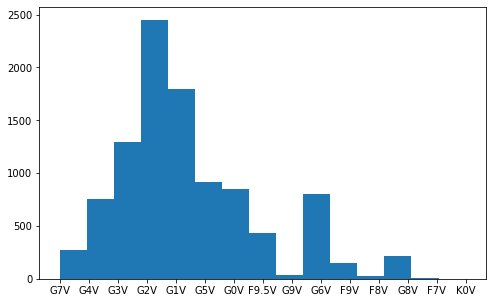

In [26]:
fig = pl.figure(figsize=(8,5))
nbins= len(np.unique(samples))
pl.hist(samples, bins=nbins);

## check HARPS RV bank

In [27]:
cr.check_harps_RV(t.target_coord)

This may take a while...
Saved: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

Nearest HARPS obj to target is
HD92536: ra,dec=(10:39:22.8311,-64:06:42.434)

Try angular distance larger than d=4604.7100"

